In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/drakyanerlanggarizkiwardhana/Orbit-AI-Mastery-Batch-4/main/IPM.csv')
df.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,IPM
0,14.36,9572,9.37,69.96,High
1,13.90,7148,9.48,65.28,Normal
2,14.32,8776,8.68,67.43,Normal
3,14.60,8180,8.88,64.40,Normal
4,14.01,8030,9.67,68.22,Normal


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2196 entries, 0 to 2195
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Harapan_Lama_Sekolah   2196 non-null   float64
 1   Pengeluaran_Perkapita  2196 non-null   int64  
 2   Rerata_Lama_Sekolah    2196 non-null   float64
 3   Usia_Harapan_Hidup     2196 non-null   float64
 4   IPM                    2196 non-null   object 
dtypes: float64(3), int64(1), object(1)
memory usage: 85.9+ KB


In [10]:
df.duplicated().sum()

0

**EDA&Visualisasi**

In [11]:
print(set(df['IPM']))

{'Low', 'Very-High', 'Normal', 'High'}


BPS mengelompokkan kategori IPM menjadi:

*   IPM < 60 : Low
*   60 ≤ IPM < 70 : Normal

*   70 ≤ IPM < 80 : High
*   IPM ≥ 80 : Very High


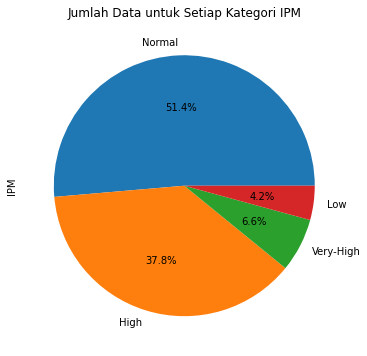

In [12]:
plt.figure(figsize=(6, 6))
df['IPM'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Jumlah Data untuk Setiap Kategori IPM')
plt.show()

Kode di atas digunakan untuk membuat visualisasi data dalam bentuk pie chart yang menunjukkan jumlah data untuk setiap kategori IPM pada dataframe df.

Pertama-tama, dilakukan pengaturan ukuran figure menggunakan plt.figure(figsize=(6, 6)). Kemudian, digunakan method value_counts() pada kolom IPM untuk menghitung jumlah data untuk setiap kategori dan dilakukan plotting dengan jenis grafik pie chart menggunakan plot(kind='pie').

Untuk menambahkan persentase pada setiap bagian pie chart, digunakan autopct='%1.1f%%' yang menunjukkan format untuk menampilkan persentase hingga satu desimal.

Terakhir, diberikan judul pada pie chart dengan plt.title('Jumlah Data untuk Setiap Kategori IPM') dan ditampilkan menggunakan plt.show().

In [13]:
df['IPM'].value_counts()

Normal       1128
High          829
Very-High     146
Low            93
Name: IPM, dtype: int64

Dari output penghitungan jumlah tiap kategori pada variabel 'IPM' di atas, diketahui bahwa kategori Normal sangat mendominasi dengan presentase sekitar 51.37% dan kategori Very High dan Low adalah 2 kategori dengan jumlah terendah.

In [14]:
df.describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,2196.000000,2196.000000,2196.000000,2196.000000
mean,12.931498,10323.144353,8.291585,69.467418
std,1.312967,2664.738311,1.611256,3.437536
min,2.950000,3975.000000,0.850000,54.820000
25%,12.350000,8599.750000,7.390000,67.210000
50%,12.860000,10192.500000,8.180000,69.785000
75%,13.570000,11670.500000,9.180000,71.712500
max,17.800000,23888.000000,12.830000,77.730000


In [15]:
df[df['IPM']=='High'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,829.000000,829.000000,829.000000,829.000000
mean,13.394692,11623.250905,9.086417,71.308384
std,0.837822,1432.000579,1.069146,2.200747
min,11.490000,8188.000000,6.980000,64.570000
25%,12.810000,10638.000000,8.280000,69.920000
50%,13.230000,11486.000000,8.950000,71.170000
75%,13.890000,12367.000000,9.900000,72.550000
max,16.410000,18121.000000,11.710000,77.730000


In [16]:
df[df['IPM']=='Low'].describe()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
count,93.000000,93.000000,93.000000,93.000000
mean,9.549892,5389.580645,4.403441,63.531075
std,2.549142,861.622866,1.635205,3.427240
min,2.950000,3975.000000,0.850000,54.820000
25%,7.660000,4826.000000,3.040000,60.230000
50%,9.810000,5282.000000,4.570000,65.170000
75%,11.720000,5633.000000,5.650000,65.740000
max,13.470000,8198.000000,7.440000,67.620000


In [18]:
# Harapan lama sekolah di bawah 12 tahun
df[df['Harapan_Lama_Sekolah']<12].shape

(288, 5)

Kode diatas digunakan untuk menghitung jumlah baris pada dataframe df dimana nilai pada kolom Harapan_Lama_Sekolah kurang dari 12

*   Terdapat 288 entry dengan Harapan Lama Sekolah di bawah 12 tahun




In [17]:
# Pengeluaran perkapita di atas 5000 USD
df[df['Pengeluaran_Perkapita']>5000].shape

(2162, 5)

Pada kode diatas akan menghitung jumlah baris pada dataframe df dimana nilai pada kolom Pengeluaran_Perkapita lebih dari 5000.

In [19]:
# Rata-rata lama sekolah di atas 12 tahun
df[df['Rerata_Lama_Sekolah']>=12].shape

(7, 5)

Meskipun hanya terdapat 288 entry yang memiliki angka Harapan Lama Sekolah di bawah 12 tahun, tetapi pada variabel Rerata Lama Sekolah hanya ada 7 entry yang memiliki rata-rata lama waktu bersekolahnya minimal 12 tahun.

In [20]:
# Angka Harapan Hidup dibawah publikasi BPS
df[df['Usia_Harapan_Hidup']<72.71].shape

(1832, 5)

Menurut BPS, rata-rata Angka Harapan Hidup masyarakat Indonesia pada tahun 2022 adalah 72.71 tahun, tetapi dari data yang diberikan, rata-rata Angka Harapan Hidup hanya 69.47 tahun dan terdapat 1832 entry yang memiliki Angka Harapan Hidup di bawah publikasi BPS.

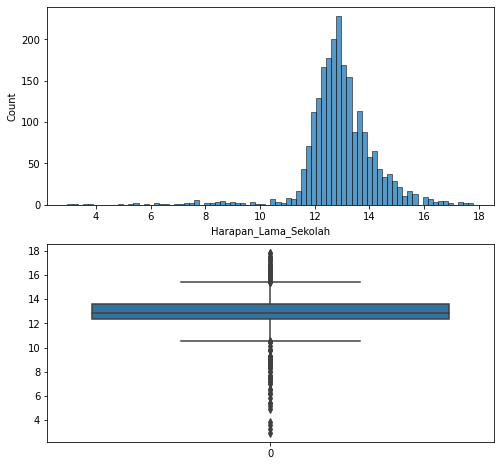

In [21]:
# Distribusi Harapan Lama Sekolah
f = plt.figure(figsize=(8,8))
f.add_subplot(2,1,1)
sns.histplot(df['Harapan_Lama_Sekolah'])
f.add_subplot(2,1,2)
sns.boxplot(df['Harapan_Lama_Sekolah'])
plt.show()

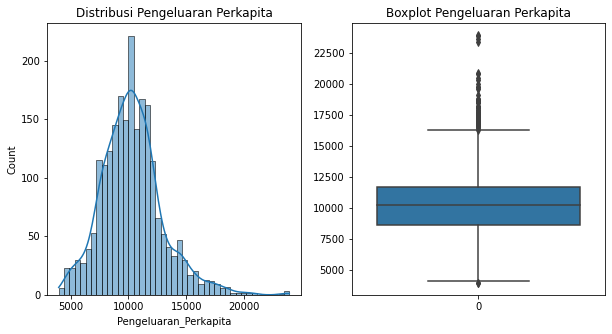

In [35]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Pengeluaran_Perkapita'], kde=True)
plt.title('Distribusi Pengeluaran Perkapita')

plt.subplot(1, 2, 2)
sns.boxplot(df['Pengeluaran_Perkapita'])
plt.title('Boxplot Pengeluaran Perkapita')

plt.show()

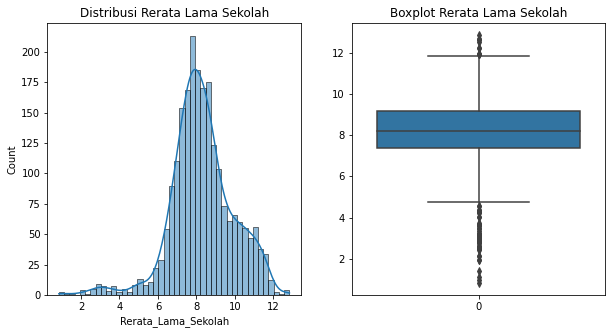

In [36]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Rerata_Lama_Sekolah'], kde=True)
plt.title('Distribusi Rerata Lama Sekolah')

plt.subplot(1, 2, 2)
sns.boxplot(df['Rerata_Lama_Sekolah'])
plt.title('Boxplot Rerata Lama Sekolah')

plt.show()

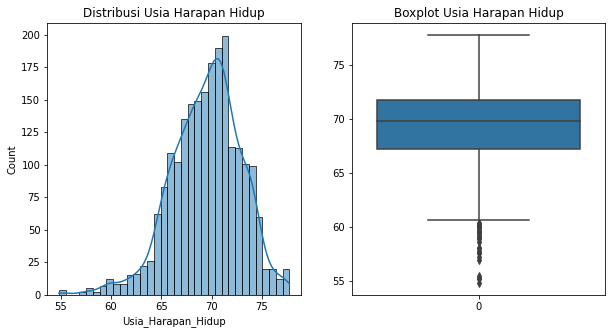

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
sns.histplot(df['Usia_Harapan_Hidup'], kde=True)
plt.title('Distribusi Usia Harapan Hidup')

plt.subplot(1, 2, 2)
sns.boxplot(df['Usia_Harapan_Hidup'])
plt.title('Boxplot Usia Harapan Hidup')

plt.show()

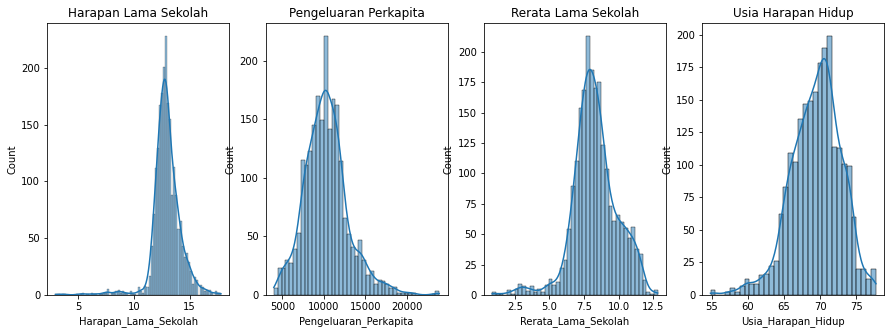

In [34]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 4, 1)
sns.histplot(df['Harapan_Lama_Sekolah'], kde=True)
plt.title('Harapan Lama Sekolah')

plt.subplot(1, 4, 2)
sns.histplot(df['Pengeluaran_Perkapita'], kde=True)
plt.title('Pengeluaran Perkapita')

plt.subplot(1, 4, 3)
sns.histplot(df['Rerata_Lama_Sekolah'], kde=True)
plt.title('Rerata Lama Sekolah')

plt.subplot(1, 4, 4)
sns.histplot(df['Usia_Harapan_Hidup'], kde=True)
plt.title('Usia Harapan Hidup')

plt.show()

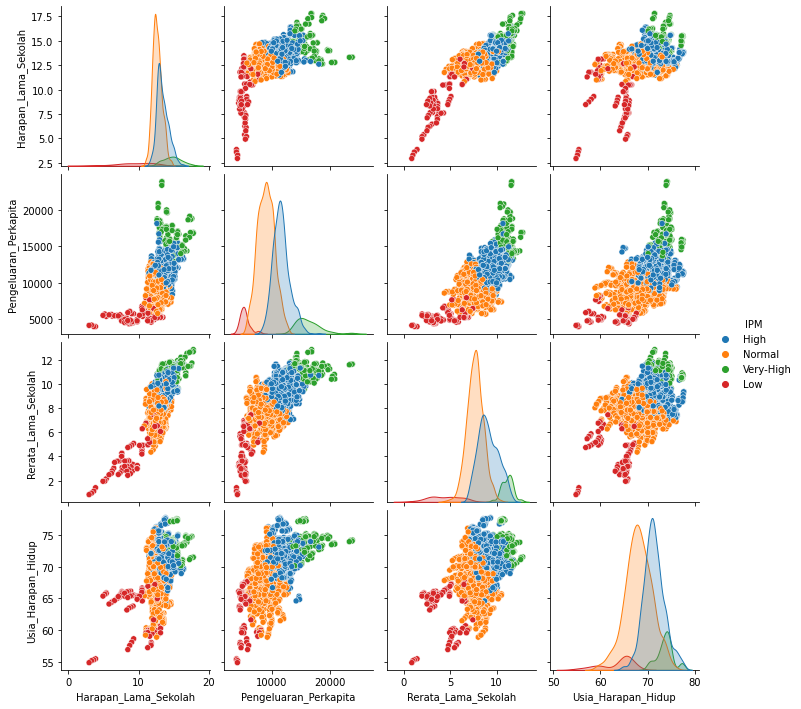

In [32]:
sns.pairplot(df, hue='IPM', height=2.5)
plt.show()

Kode sns.pairplot(df, hue='IPM', height=2.5) digunakan untuk membuat plot matriks yang menunjukkan hubungan antara setiap pasangan variabel pada dataset df. Plot matriks ini dapat memberikan pemahaman yang lebih dalam tentang bagaimana variabel-variabel dalam dataset berinteraksi satu sama lain.

Argumen hue='IPM' digunakan untuk memberikan warna berbeda pada plot untuk setiap kategori yang terdapat pada variabel 'IPM', sehingga dapat memudahkan pemahaman pola data.

Argumen height=2.5 digunakan untuk menentukan ukuran plot.

Setelah plot selesai dibuat, plt.show() digunakan untuk menampilkan plot ke layar.

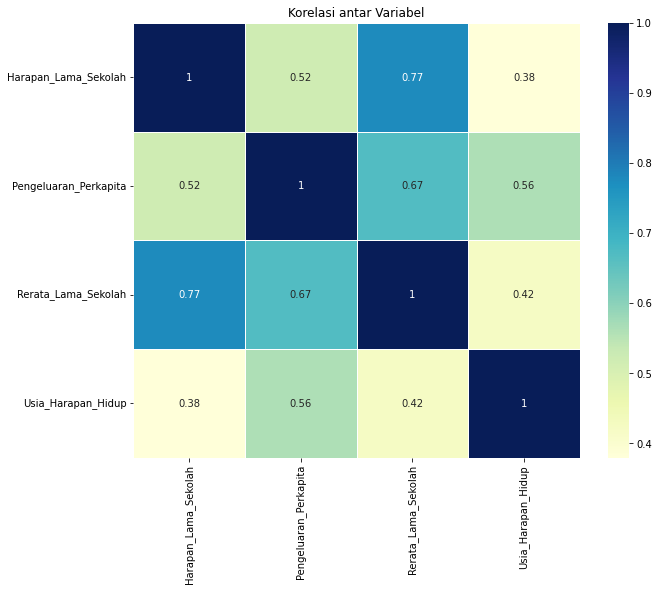

In [39]:
plt.figure(figsize=(10,8))

corr = df.corr()

sns.heatmap(corr, cmap="YlGnBu", annot=True, linewidths=0.5)
plt.title('Korelasi antar Variabel')

plt.show()

Kode diatas digunakan untuk membuat plot peta panas (heatmap) korelasi antar variabel pada dataset df. Plot peta panas memperlihatkan korelasi yang lebih kuat dalam warna yang lebih terang, sedangkan korelasi yang lebih lemah dalam warna yang lebih pudar.

**Scaling**

Karena data memiliki banyak outlier, akan dilakukan sclaing dengan metode Quantile Transformer:

In [56]:
scaler = RobustScaler()
scaler.fit(df.iloc[:,:-1])
df_scaler = scaler.transform(df.iloc[:,:-1])
df_scaler = pd.DataFrame(df_scaler, columns=df.iloc[:,:-1].columns)
df_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup
0,1.229508,-0.202068,0.664804,0.038867
1,0.852459,-0.991452,0.726257,-1.000555
2,1.196721,-0.461288,0.279330,-0.523043
3,1.426230,-0.655377,0.391061,-1.196002
4,0.942623,-0.704225,0.832402,-0.347585


**Encoding**

In [57]:
enc = OrdinalEncoder()
df['code_IPM'] = enc.fit_transform(df[['IPM']])

In [58]:
df_scaler.insert(4, 'code_IPM', df['code_IPM'])
df_scaler.head()

,Harapan_Lama_Sekolah,Pengeluaran_Perkapita,Rerata_Lama_Sekolah,Usia_Harapan_Hidup,code_IPM
0,1.229508,-0.202068,0.664804,0.038867,0.0
1,0.852459,-0.991452,0.726257,-1.000555,2.0
2,1.196721,-0.461288,0.279330,-0.523043,2.0
3,1.426230,-0.655377,0.391061,-1.196002,2.0
4,0.942623,-0.704225,0.832402,-0.347585,2.0


**Modelling**

In [60]:
X = df_scaler.iloc[:,:-1]
y = df_scaler.iloc[:,-1]

In [61]:
# Membagi dataset menjadi data training dan testing dengan proporsi 4:1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((1756, 4), (440, 4))

**Random Forest**

In [62]:
classifier_rf = RandomForestClassifier()
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [63]:
y_pred = classifier_rf.predict(X_test)

**Evaluasi**

In [64]:
# Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[158,   0,   4,   2],
       [  0,  15,   1,   0],
       [  5,   0, 222,   0],
       [  1,   0,   0,  32]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       164
         1.0       1.00      0.94      0.97        16
         2.0       0.98      0.98      0.98       227
         3.0       0.94      0.97      0.96        33

    accuracy                           0.97       440
   macro avg       0.97      0.96      0.97       440
weighted avg       0.97      0.97      0.97       440



In [67]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9704545454545455


**Balancing**

In [68]:
SMOTE = SMOTE()
X_train_SMOTE, y_train_SMOTE = SMOTE.fit_resample(X_train, y_train)
     

In [69]:
classifier_rf2 = RandomForestClassifier()
classifier_rf2.fit(X_train_SMOTE, y_train_SMOTE)

RandomForestClassifier()

In [70]:
y_pred = classifier_rf2.predict(X_test)

**Evaluasi**

In [75]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[158,   0,   4,   2],
       [  0,  15,   1,   0],
       [  5,   0, 222,   0],
       [  1,   0,   0,  32]])

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96       164
         1.0       1.00      0.94      0.97        16
         2.0       0.98      0.98      0.98       227
         3.0       0.94      0.97      0.96        33

    accuracy                           0.97       440
   macro avg       0.97      0.96      0.97       440
weighted avg       0.97      0.97      0.97       440



In [94]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf2.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf2.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9795454545454545


**AdaBoost**

In [78]:
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train, y_train)
y_pred_AB = ABclassifier.predict(X_test)

In [79]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB)
cm

array([[127,   0,  37,   0],
       [  0,  16,   0,   0],
       [ 35,  15, 177,   0],
       [ 33,   0,   0,   0]])

In [80]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

         0.0       0.65      0.77      0.71       164
         1.0       0.52      1.00      0.68        16
         2.0       0.83      0.78      0.80       227
         3.0       0.00      0.00      0.00        33

    accuracy                           0.73       440
   macro avg       0.50      0.64      0.55       440
weighted avg       0.69      0.73      0.70       440



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [81]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', ABclassifier.score(X_train, y_train))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', ABclassifier.score(X_test, y_test))

Skor akurasi data latih: 0.7539863325740319
Skor akurasi data uji: 0.7272727272727273


In [82]:
ABclassifier = AdaBoostClassifier()

ABclassifier.fit(X_train_SMOTE, y_train_SMOTE)
y_pred_AB = ABclassifier.predict(X_test)

In [83]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred_AB)
cm

array([[ 19, 140,   0,   5],
       [  0,  16,   0,   0],
       [  0, 227,   0,   0],
       [ 22,   0,   0,  11]])

In [84]:
print(classification_report(y_test, y_pred_AB))

              precision    recall  f1-score   support

         0.0       0.46      0.12      0.19       164
         1.0       0.04      1.00      0.08        16
         2.0       0.00      0.00      0.00       227
         3.0       0.69      0.33      0.45        33

    accuracy                           0.10       440
   macro avg       0.30      0.36      0.18       440
weighted avg       0.23      0.10      0.11       440



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Setelah Balancing**

In [85]:
#Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', ABclassifier.score(X_train_SMOTE, y_train_SMOTE))
#Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', ABclassifier.score(X_test, y_test))

Skor akurasi data latih: 0.3992785793562708
Skor akurasi data uji: 0.10454545454545454


**KNN**

In [86]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [87]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   0,   6,   5],
       [  0,  15,   1,   0],
       [  6,   0, 221,   0],
       [  0,   0,   0,  33]])

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       164
         1.0       1.00      0.94      0.97        16
         2.0       0.97      0.97      0.97       227
         3.0       0.87      1.00      0.93        33

    accuracy                           0.96       440
   macro avg       0.95      0.96      0.95       440
weighted avg       0.96      0.96      0.96       440



In [89]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train, y_train))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 1.0
Skor akurasi data uji: 0.9704545454545455


**Setelah Balancing**

In [90]:
knn = KNeighborsClassifier()
knn.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = knn.predict(X_test)

In [91]:
#Menghitung confusion matrix dari y hasil prediksi dan y nilai asli
cm = confusion_matrix(y_test, y_pred)
cm

array([[153,   0,   5,   6],
       [  0,  16,   0,   0],
       [  6,   1, 220,   0],
       [  0,   0,   0,  33]])

In [92]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95       164
         1.0       0.94      1.00      0.97        16
         2.0       0.98      0.97      0.97       227
         3.0       0.85      1.00      0.92        33

    accuracy                           0.96       440
   macro avg       0.93      0.98      0.95       440
weighted avg       0.96      0.96      0.96       440



In [93]:
# Menampilkan nilai akurasi untuk prediksi di data training
print('Skor akurasi data latih:', classifier_rf.score(X_train_SMOTE, y_train_SMOTE))
# Menampilkan nilai akurasi untuk prediksi di data testing
print('Skor akurasi data uji:', classifier_rf.score(X_test, y_test))

Skor akurasi data latih: 0.991953385127636
Skor akurasi data uji: 0.9704545454545455


**Kesimpulan**

Berdasarkan hasil analisis pada dataset ini, dapat disimpulkan bahwa model Random Forest Classifier dan K-Nearest Neighbors Classifier mampu menghasilkan performa yang cukup baik dalam melakukan klasifikasi pada dataset. Model Random Forest Classifier dengan SMOTE resampling menghasilkan akurasi tertinggi pada data training dengan skor 99.20%, sedangkan model K-Nearest Neighbors Classifier dengan SMOTE resampling menghasilkan akurasi tertinggi pada data testing dengan skor 96.04%.



*   Dari hasil analisis data, masih terdapat sekitar 13.11% data yang memiliki Harapan Lama Sekolah di bawah 12 tahun, yang menunjukkan bahwa masih terdapat permasalahan pendidikan yang perlu diperbaiki di Indonesia.

*   Hanya ada sekitar 0.3% data yang memiliki rata-rata bersekolah di atas 12 tahun, yang menunjukkan bahwa masih terdapat banyak orang di Indonesia yang belum mendapatkan akses pendidikan yang memadai.

*   Sebanyak 83.42% data memiliki usia harapan hidup di bawah rata-rata yang dipublikasikan oleh BPS, yang menunjukkan bahwa masih terdapat tantangan dalam meningkatkan kesehatan dan kesejahteraan masyarakat Indonesia.

*   Dalam analisis data ini, terdapat banyak outlier pada variabel Harapan Lama Sekolah dan Rata-rata Lama Sekolah yang perlu diperhatikan dalam analisis data selanjutnya.

*   Berdasarkan hasil evaluasi model, Random Forest dengan proses balancing data metode SMOTE menghasilkan akurasi terbaik dalam memprediksi kategori IPM.







**Rekomendasi**



*   Random Forest dapat digunakan sebagai salah satu metode klasifikasi Indeks Pembangunan Manusia dengan akurasi yang cukup tinggi, sehingga bisa dijadikan sebagai salah satu pilihan dalam pengambilan keputusan terkait pengembangan dan peningkatan IPM.

*   Pemerintah dapat memperbaiki sistem pendidikan dengan memberikan beasiswa dan motivasi pendidikan bagi masyarakat yang kurang mampu, sehingga mereka dapat memperoleh akses pendidikan yang memadai dan meningkatkan Harapan Lama Sekolah serta Rata-rata Lama Sekolah.

*   Pemerintah juga dapat memberikan stimulus ekonomi dan bantuan sosial bagi masyarakat yang kurang mampu, sehingga dapat meningkatkan kesejahteraan masyarakat dan usia harapan hidup.

*   Selain itu, pemerintah dapat meningkatkan jaminan sosial kesehatan dan peningkatan fasilitas kesehatan, sehingga dapat meningkatkan kualitas kesehatan dan usia harapan hidup masyarakat.



